In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("max_colwidth", 400)

import json


Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
466,application_1632762077345_0468,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
path_raw = 's3://mist-secorapp-production/ap-events/ap-events-production/dt=2021-11-*/*'
ap_raw = sc.sequenceFile(path_raw)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
oc_raw = ap_raw.map(lambda x: json.loads(x[1]))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
data_list = oc_raw.filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name']  == 'SW_ALARM_CHASSIS_FAN').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df.groupby(['switch_id']).size().sort_values(ascending=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

switch_id
50c709fb19a0    2208
2c2131c3e48e    1684
40a677817bc0    1309
3c8c93a78fd2     141
f07cc78b0294     136
f07cc77b5237       8
e030f9593191       6
9c8acba1b83c       6
fc33425bd0e1       5
1039e97e4e56       4
1039e97ddc8f       3
f07cc76c6d2f       3
f07cc77b953a       3
30b64faa64e0       2
408f9d0779b4       2
f07cc77b3d1d       1
f07cc77afc62       1
f07cc77ae1dd       1
0c599c63ecbf       1
f07cc77b59ea       1
f07cc7d5bc7f       1
f07cc7d5c2c5       1
f07cc7dfc5e5       1
f4a739c2e068       1
fc96432877f0       1
fc964331aaf1       1
e8a2452e5b36       1
b48a5f1966ec       1
c8fe6af5c578       1
c8fe6af5b46f       1
0c599c6c4544       1
1039e97d9c90       1
1039e97dba0e       1
1039e97dfba4       1
1039e97e298d       1
1039e97e44a4       1
182ad35aae2e       1
384f4919e9a0       1
4c6d586a31a9       1
4c6d586d30b0       1
88d98fa1c3e0       1
88e64bfd73c0       1
0c599c6aa7ed       1
b8c253088e1b       1
c00380f05b90       1
fc964331c807       1
dtype: int64

In [6]:
data_list = oc_raw.filter(lambda x: x.get("switch_id") == "f07cc78b0294").filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name']  == 'SW_ALARM_CHASSIS_FAN').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['event_type', 'site_id', 'org_id', 'timestamp', 'device_type',
       'switch_id', 'source.org', 'source.site', 'source.mac', 'source.model',
       'source.ev_name', 'source.fw_version', 'source.version', 'source.ev_ts',
       'source.detail', 'source.client', 'source.device_type',
       'source.alarm_class', 'source.alarm_type'],
      dtype='object')

In [8]:
a = df['source.detail'].unique()
a

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['FPC 0 Fan 0 not spinning', 'FPC 0 Fan 1 not spinning'],
      dtype=object)

In [9]:
b = df['source.alarm_type'].unique()
b

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['Chassis'], dtype=object)

In [10]:
c = df['source.ev_name'].unique()
c

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['SW_ALARM_CHASSIS_FAN'], dtype=object)

In [11]:
data_list[0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'event_type': 'device_events', 'site_id': '6e5de125-04ac-463c-989d-886d1cc28a0a', 'org_id': 'ae5cbe52-d229-4c78-85f1-997df31e8860', 'timestamp': 1635747339000000, 'source': {'org': 'ae5cbe52-d229-4c78-85f1-997df31e8860', 'site': '6e5de125-04ac-463c-989d-886d1cc28a0a', 'mac': 'f07cc78b0294', 'model': 'EX3400-24P', 'ev_name': 'SW_ALARM_CHASSIS_FAN', 'fw_version': '18.3R3.8', 'version': 1, 'ev_ts': 1635747339, 'detail': 'FPC 0 Fan 0 not spinning', 'client': '00-00-00-00-00-00', 'device_type': 'switch', 'alarm_class': 'Major', 'alarm_type': 'Chassis'}, 'device_type': 'switch', 'switch_id': 'f07cc78b0294'}

In [12]:
df['date'] = pd.to_datetime(df['timestamp']/1000, unit='ms')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
from datetime import datetime

df['time'] = df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
df['time'].head(5)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    06:15:39
1    06:06:39
2    06:51:40
3    10:33:27
4    14:06:33
Name: time, dtype: object

In [15]:
viz_series = df.groupby(['time']).size().sort_values(ascending=False)
viz_df = pd.DataFrame({'time':viz_series.index, 'count':viz_series.values})
viz_df = viz_df.sort_values('time')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
viz_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         time  count
1    00:13:50      1
69   00:24:23      1
100  00:33:30      1
99   01:03:47      1
98   01:21:25      1

In [17]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

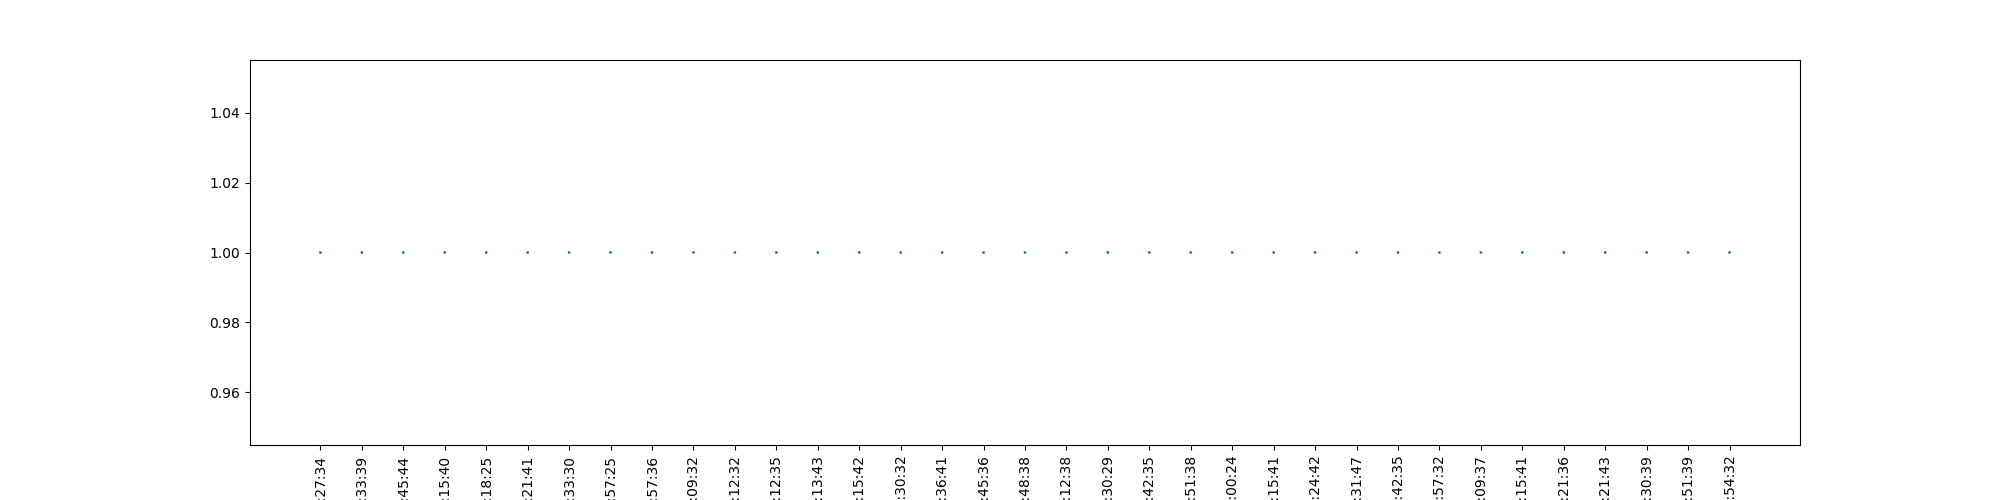

In [18]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=viz_df['time'][100:200], y=viz_df['count'][100:200], s=viz_df['count'][100:200])


plt.show()
%matplot plt

In [19]:
date_series = df.groupby(['date']).size().sort_values(ascending=False)
date_df = pd.DataFrame({'date':date_series.index, 'count':date_series.values})
date_df = date_df.sort_values('date')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
0   2021-11-01 06:06:39      1
9   2021-11-01 06:15:39      1
100 2021-11-01 06:51:40      1
99  2021-11-01 10:33:27      1
98  2021-11-01 14:06:33      1

In [21]:
clone_df = date_df[['date', 'count']].copy()
clone_df = clone_df.set_index('date').resample('30min').sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
clone_df.index.name = 'date'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
clone_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     count
date                      
2021-11-01 06:00:00      2
2021-11-01 06:30:00      1
2021-11-01 07:00:00      0
2021-11-01 07:30:00      0
2021-11-01 08:00:00      0

In [24]:
clone_df['date'] = clone_df.index

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
clone_df['time'] = clone_df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

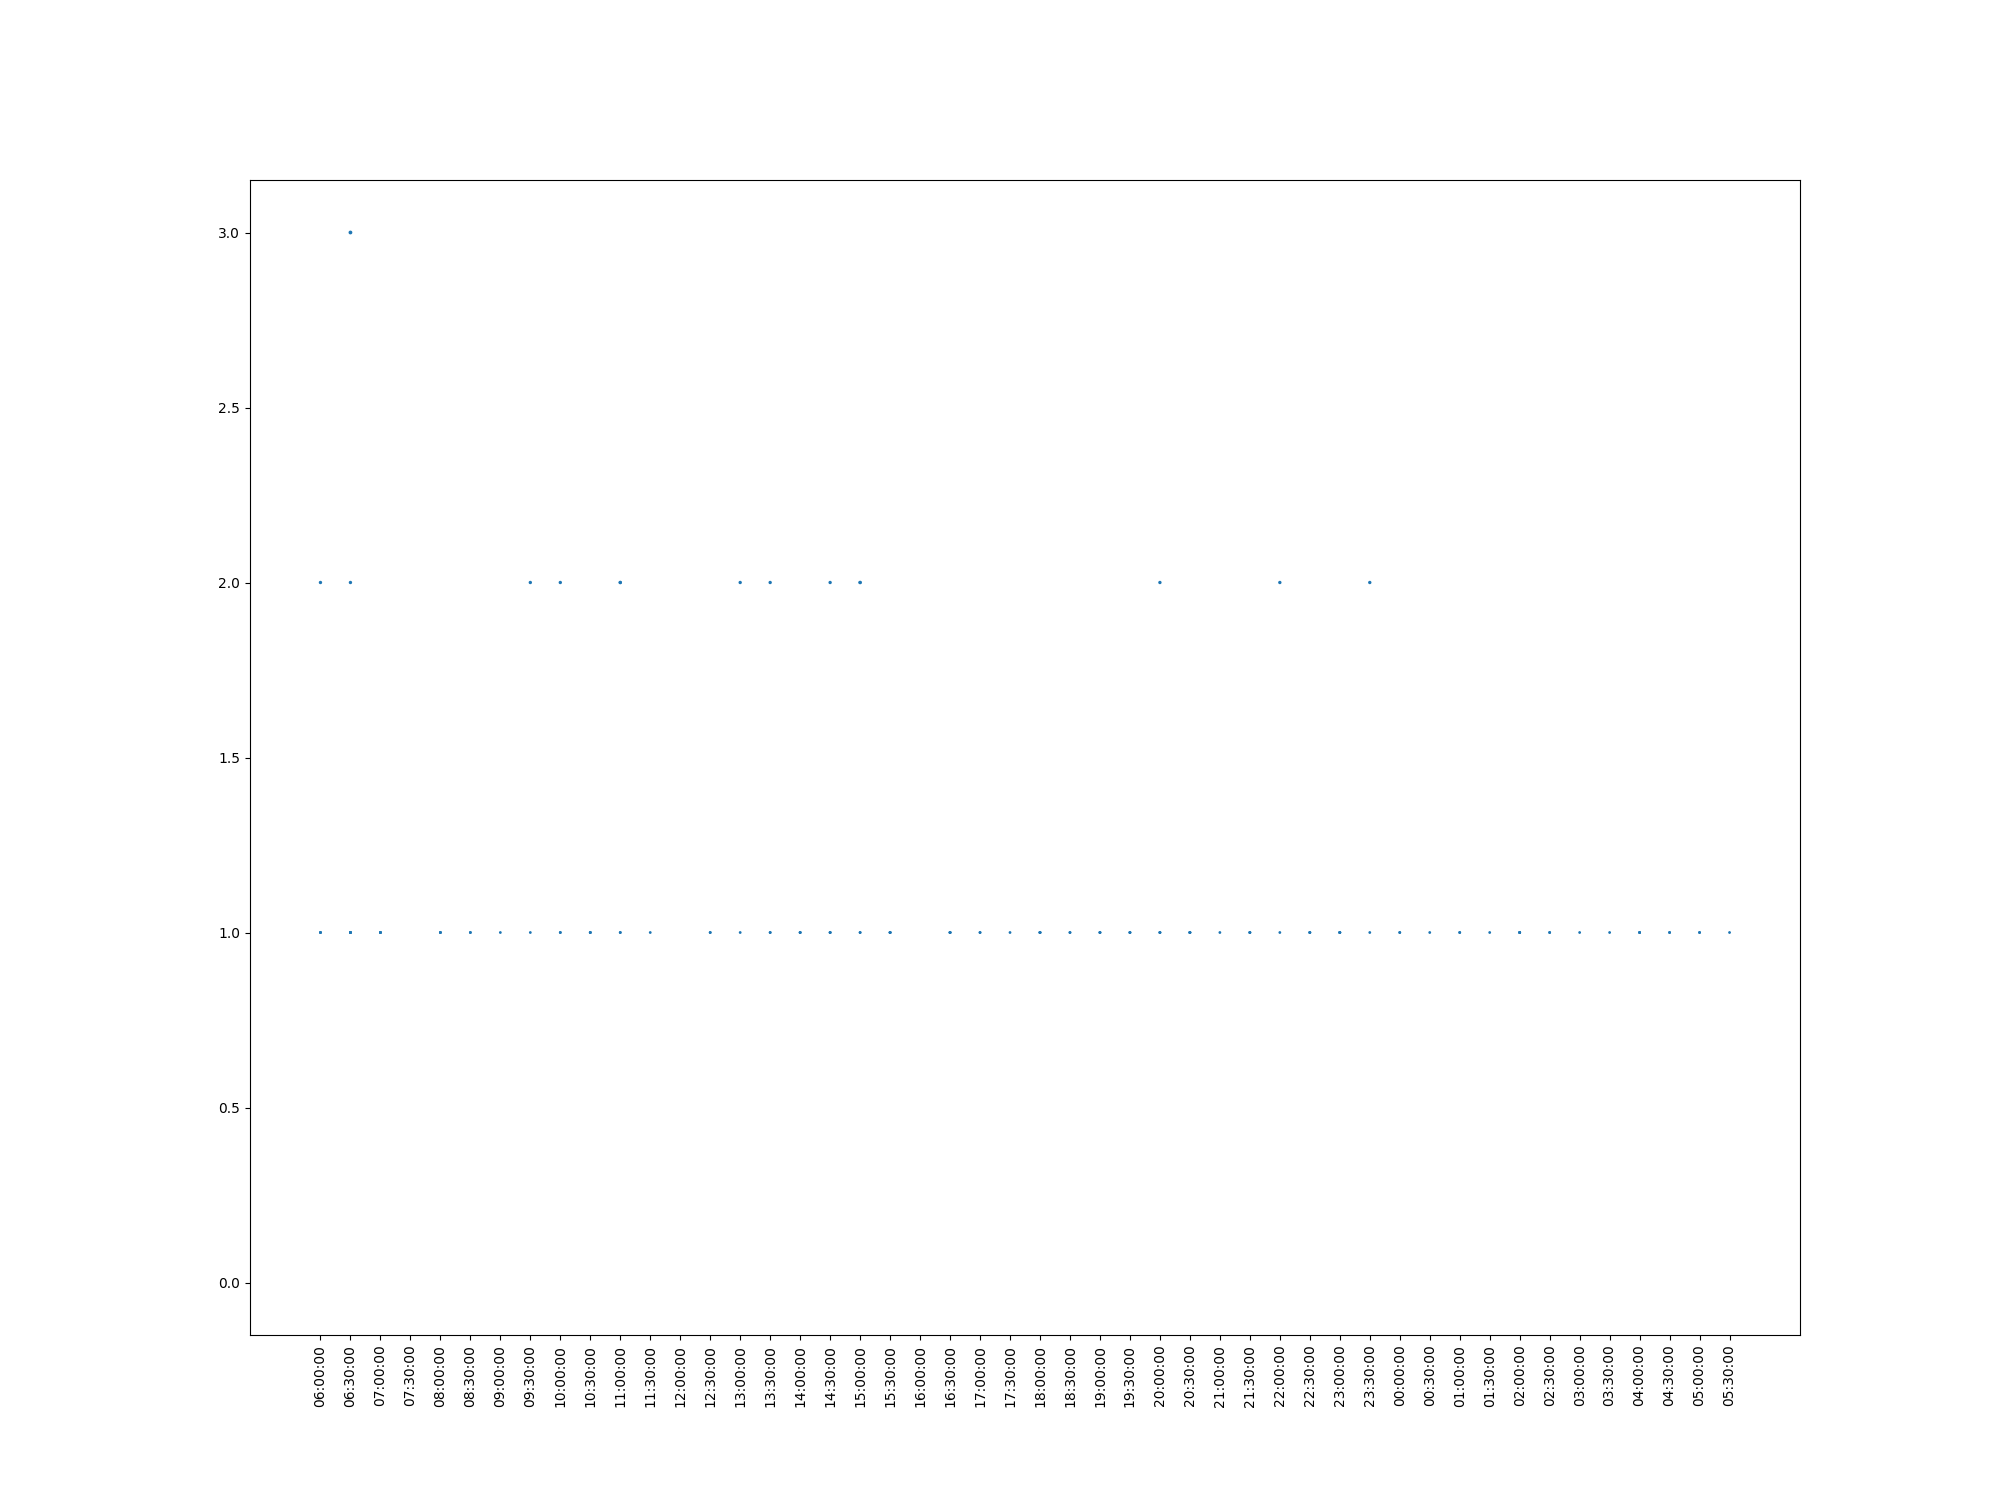

In [27]:
plt.figure(figsize=(20,15))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=clone_df['time'], y=clone_df['count'], s=clone_df['count'])


plt.show()
%matplot plt

In [28]:
max(clone_df['count'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3

In [29]:
clone_df['count'].mean()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.23734729493891799

In [30]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
0   2021-11-01 06:06:39      1
9   2021-11-01 06:15:39      1
100 2021-11-01 06:51:40      1
99  2021-11-01 10:33:27      1
98  2021-11-01 14:06:33      1

In [31]:
date_df['time_delta'] = date_df['date'] - date_df['date'].shift()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count      time_delta
0   2021-11-01 06:06:39      1             NaT
9   2021-11-01 06:15:39      1 0 days 00:09:00
100 2021-11-01 06:51:40      1 0 days 00:36:01
99  2021-11-01 10:33:27      1 0 days 03:41:47
98  2021-11-01 14:06:33      1 0 days 03:33:06

In [33]:
time_delta_series = date_df.groupby(['time_delta']).size().sort_values(ascending=False)
delta_df = pd.DataFrame({'time_delta':time_delta_series.index, 'count':time_delta_series.values})
delta_df = delta_df.sort_values('time_delta')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
delta_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        time_delta  count
0  0 days 00:03:00      4
3  0 days 00:06:00      3
7  0 days 00:09:00      3
23 0 days 00:09:01      2
24 0 days 00:12:00      2

In [35]:
plt.clf()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

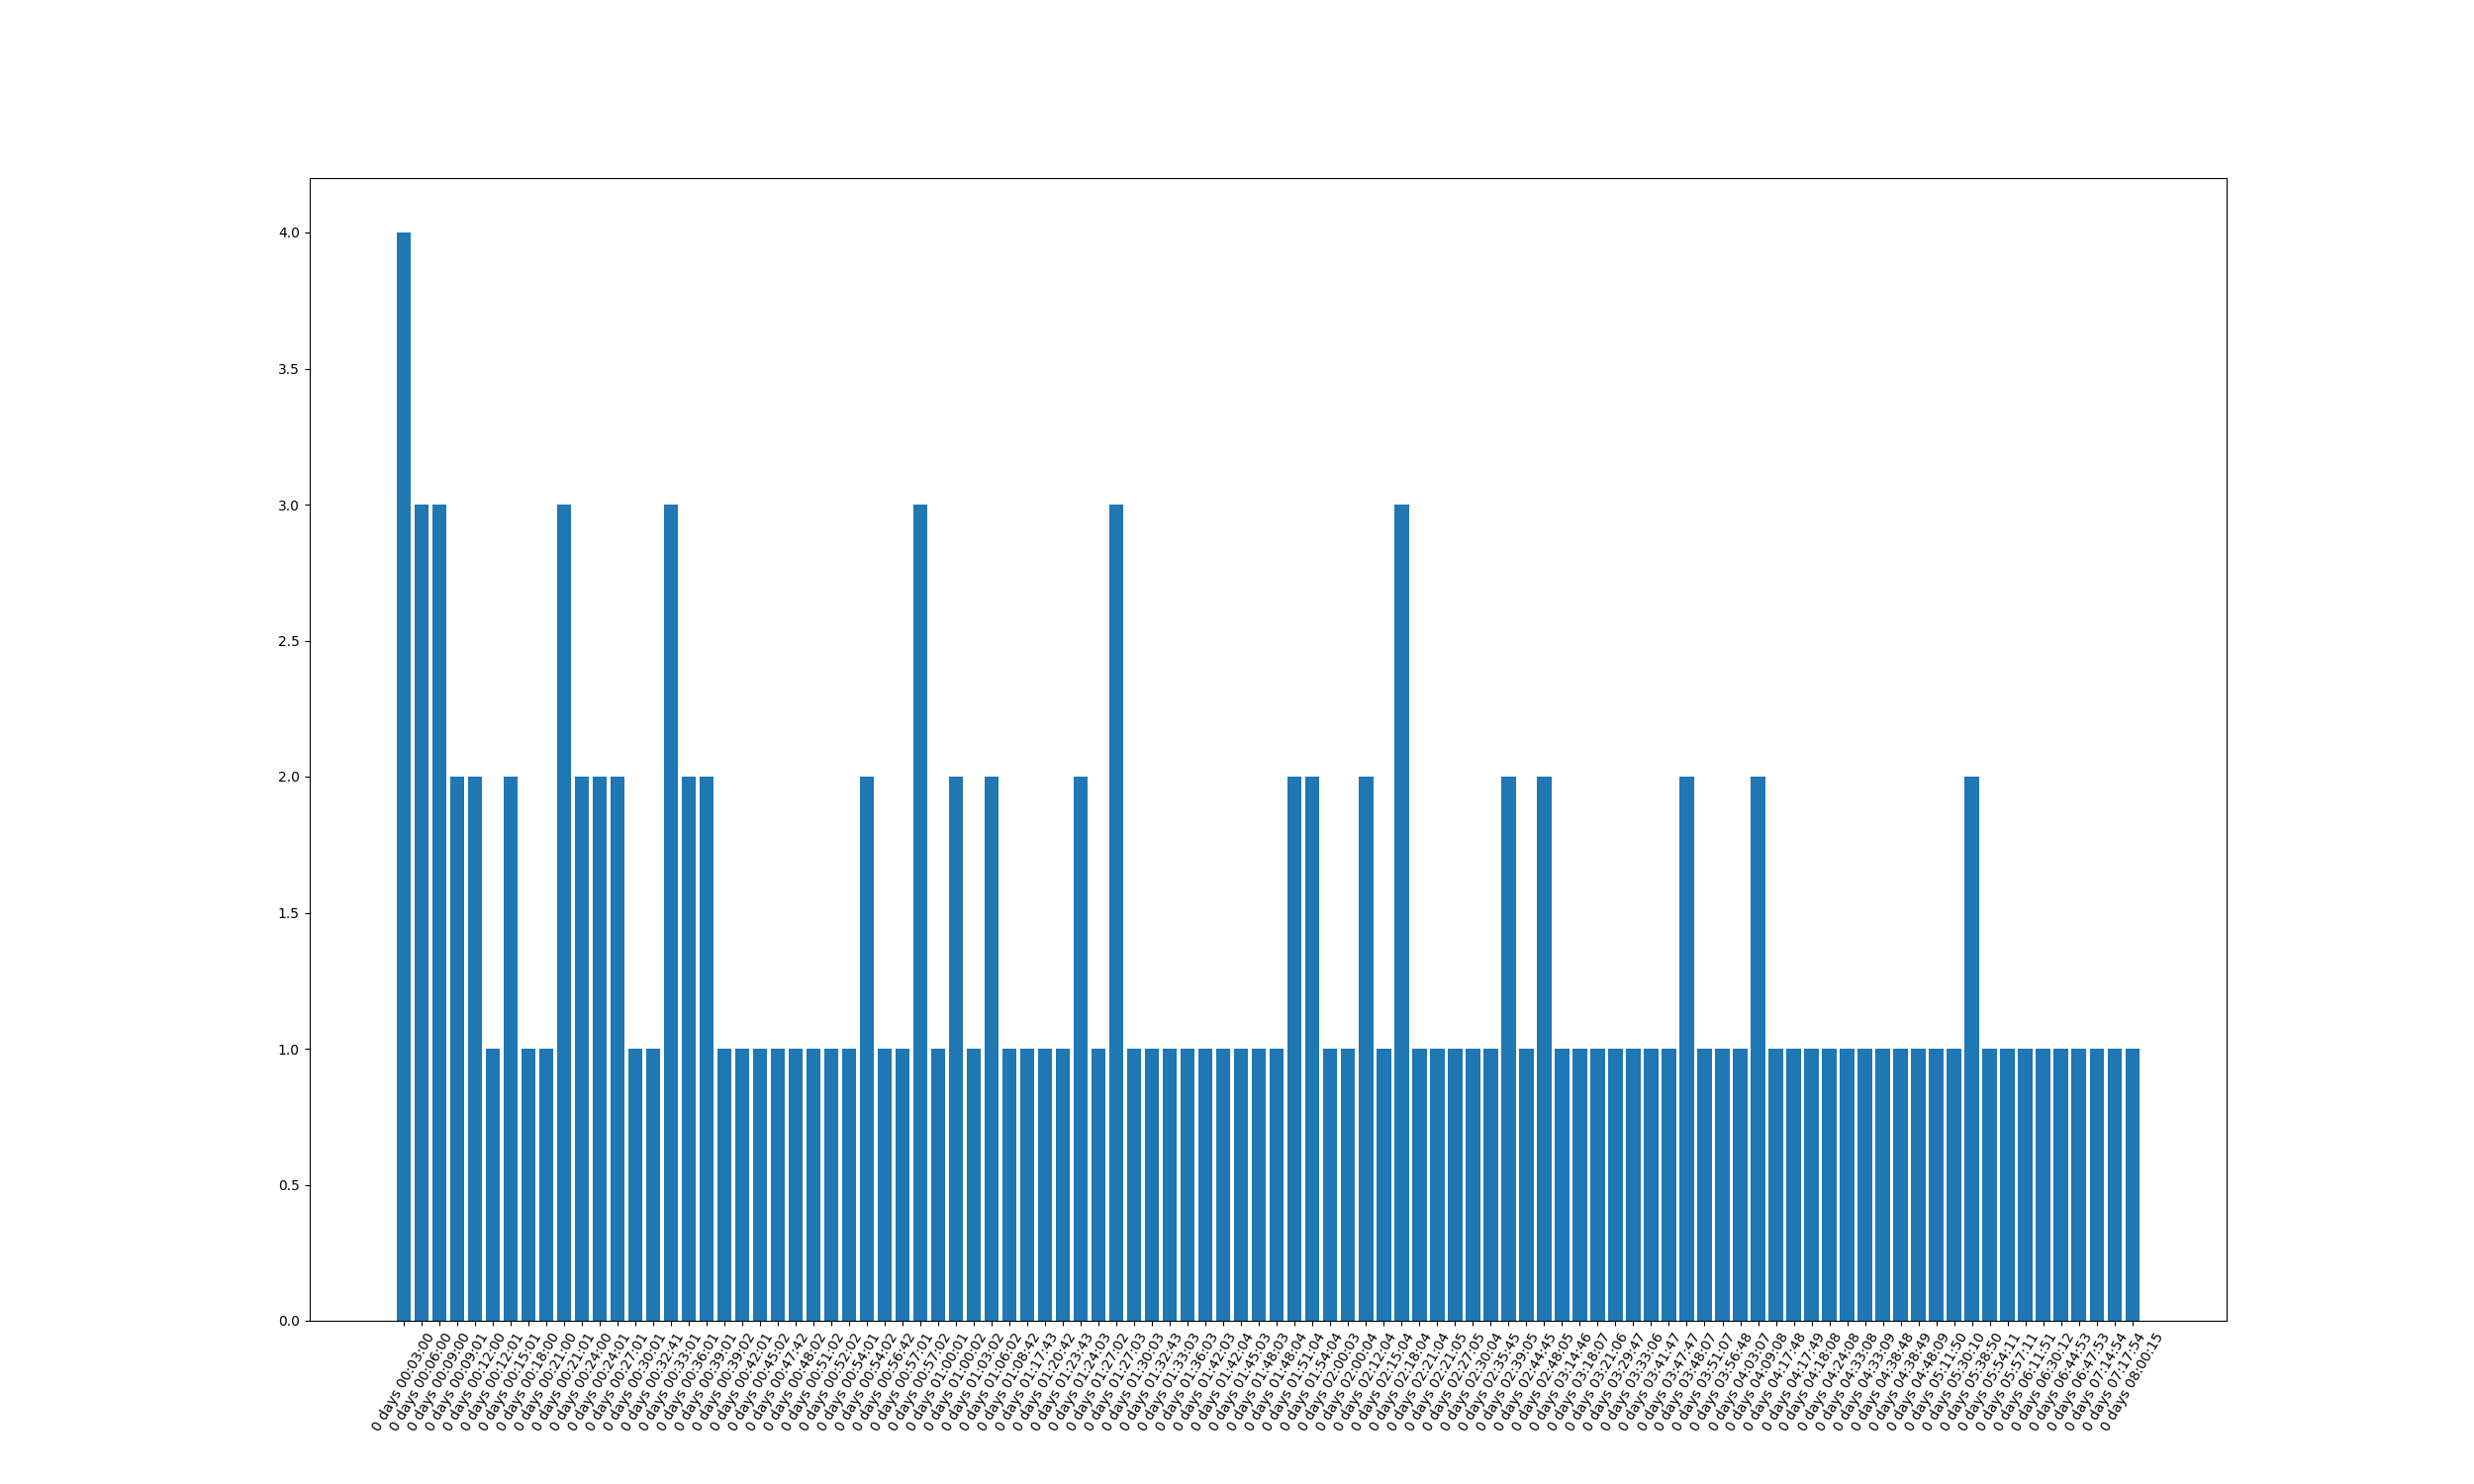

In [36]:
plt.figure(figsize=(25,15))
plt.xticks(rotation=60)

plt.bar(delta_df['time_delta'].astype(str),delta_df['count'])
plt.show()

%matplot plt

In [37]:
data_list_2 = oc_raw.filter(lambda x: x.get("switch_id") == "50c709fb19a0").filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name']  == 'SW_ALARM_CHASSIS_FAN').collect()
df_2 = pd.json_normalize(data_list_2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
a = df_2['source.detail'].unique()
a

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['FPC 1 Fan 1 not spinning'], dtype=object)